# Bussines Problem
<b> The Financial Technology company (Fin-Tech Company)</b> launch there a mobile app. This app used for financial purposes like bank loans, savings, etc. in one place. It has two versions free and premium. The free version app contains basic features and customer wants to use the premium feature then they have to pay some amount to unlock it.
   <br> 
    The main goal of the company is to sell the premium version app with low advertisement cost but they don’t know how to do it. That’s a reason they are provided the premium feature in the free version app for 24 hours to collect the customer’s behavior. After that, the company hired the Machine Learning Engineer to find insight from the collected data (customer’s behavior).
 <br> 
The job of the ML engineer is to find or predict new customer who is interested to buy the product or not. If the customers will buy a product anyway so no need to give an offer to that customer and loss the business. Only give offers to those customers who are interested to use premium version app but they can’t afford its cost. So the company will give offers to those customers and earn more money.

## Importing the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from dateutil import parser # for columns like 'first_open' & 'enrolled_date'

## Importing the Dataset

In [2]:
df= pd.read_csv('appdata10.csv')

In [3]:
df.head(10)

,user,first_open,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,enrolled_date,liked
0,235136,2012-12-27 02:14:51.273,3,02:00:00,23,"idscreen,joinscreen,Cycle,product_review,ScanP...",15,0,0,0,NaN,0
1,333588,2012-12-02 01:16:00.905,6,01:00:00,24,"joinscreen,product_review,product_review2,Scan...",13,0,0,0,NaN,0
2,254414,2013-03-19 19:19:09.157,1,19:00:00,23,"Splash,Cycle,Loan",3,0,1,0,NaN,1
3,234192,2013-07-05 16:08:46.354,4,16:00:00,28,"product_review,Home,product_review,Loan3,Finan...",40,0,0,1,2013-07-05 16:11:49.513,0
4,51549,2013-02-26 18:50:48.661,1,18:00:00,31,"idscreen,joinscreen,Cycle,Credit3Container,Sca...",32,0,0,1,2013-02-26 18:56:37.841,1
5,56480,2013-04-03 09:58:15.752,2,09:00:00,20,"idscreen,Cycle,Home,ScanPreview,VerifyPhone,Ve...",14,0,0,1,2013-04-03 09:59:03.291,0
6,144649,2012-12-25 02:33:18.461,1,02:00:00,35,"product_review,product_review2,ScanPreview",3,0,0,0,NaN,0
7,249366,2012-12-11 03:07:49.875,1,03:00:00,26,"Splash,Cycle,Home,Credit3Container,Credit3Dash...",41,0,1,0,NaN,0
8,372004,2013-03-20 14:22:01.569,2,14:00:00,29,"product_review,product_review2,ScanPreview,Ver...",33,1,1,1,2013-04-27 22:24:54.542,0
9,338013,2013-04-26 18:22:16.013,4,18:00:00,26,"Home,Loan2,product_review,product_review,produ...",19,0,0,1,2013-04-26 18:31:58.923,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   user                  50000 non-null  int64 
 1   first_open            50000 non-null  object
 2   dayofweek             50000 non-null  int64 
 3   hour                  50000 non-null  object
 4   age                   50000 non-null  int64 
 5   screen_list           50000 non-null  object
 6   numscreens            50000 non-null  int64 
 7   minigame              50000 non-null  int64 
 8   used_premium_feature  50000 non-null  int64 
 9   enrolled              50000 non-null  int64 
 10  enrolled_date         31074 non-null  object
 11  liked                 50000 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 4.6+ MB


In [5]:
df.describe()

,user,dayofweek,age,numscreens,minigame,used_premium_feature,enrolled,liked
count,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,186889.729900,3.029860,31.72436,21.095900,0.107820,0.172020,0.621480,0.165000
std,107768.520361,2.031997,10.80331,15.728812,0.310156,0.377402,0.485023,0.371184
min,13.000000,0.000000,16.00000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,93526.750000,1.000000,24.00000,10.000000,0.000000,0.000000,0.000000,0.000000
50%,187193.500000,3.000000,29.00000,18.000000,0.000000,0.000000,1.000000,0.000000
75%,279984.250000,5.000000,37.00000,28.000000,0.000000,0.000000,1.000000,0.000000
max,373662.000000,6.000000,101.00000,325.000000,1.000000,1.000000,1.000000,1.000000


<b> the 'hour' column is like a string so we need to fix it

In [7]:
df["hour"] = df.hour.str.slice(1, 3).astype(int)

In [8]:
df.head(2) # look at the hour column

,user,first_open,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,enrolled_date,liked
0,235136,2012-12-27 02:14:51.273,3,2,23,"idscreen,joinscreen,Cycle,product_review,ScanP...",15,0,0,0,NaN,0
1,333588,2012-12-02 01:16:00.905,6,1,24,"joinscreen,product_review,product_review2,Scan...",13,0,0,0,NaN,0


<strong>
Here enrolled date column has missing value so lets remove it

In [10]:
# Finding the null values.
print(df.isnull().sum())

user                        0
first_open                  0
dayofweek                   0
hour                        0
age                         0
screen_list                 0
numscreens                  0
minigame                    0
used_premium_feature        0
enrolled                    0
enrolled_date           18926
liked                       0
dtype: int64


In [11]:
# Dropping the missing values
df1 = df.dropna()

In [12]:
print(df1.isnull().sum())

user                    0
first_open              0
dayofweek               0
hour                    0
age                     0
screen_list             0
numscreens              0
minigame                0
used_premium_feature    0
enrolled                0
enrolled_date           0
liked                   0
dtype: int64


In [17]:
df1.dtypes

user                     int64
first_open              object
dayofweek                int64
hour                    object
age                      int64
screen_list             object
numscreens               int64
minigame                 int64
used_premium_feature     int64
enrolled                 int64
enrolled_date           object
liked                    int64
dtype: object

## Checking for duplicates in 1st column

In [27]:
# checking for duplicates
duplicate_rows_df = df1[df1.duplicated()]

In [28]:
duplicate_rows_df.shape

(7, 12)

In [29]:
df1.shape

(31074, 12)

In [30]:
# Check total number of Rows.
df1.count() 

user                    31074
first_open              31074
dayofweek               31074
hour                    31074
age                     31074
screen_list             31074
numscreens              31074
minigame                31074
used_premium_feature    31074
enrolled                31074
enrolled_date           31074
liked                   31074
dtype: int64

In [31]:
#Removing the duplicate values.
df2 = df1.drop_duplicates()

In [32]:
df2.count()

user                    31067
first_open              31067
dayofweek               31067
hour                    31067
age                     31067
screen_list             31067
numscreens              31067
minigame                31067
used_premium_feature    31067
enrolled                31067
enrolled_date           31067
liked                   31067
dtype: int64

## Plotting data

Plot a histogram for only required columns not for all.
So we can drop the columns that will not be required in histogram

Thus we will be using only NUMERICAL COLUMNS

HISTOGRAM--> Gives a general view of DISTRIBUTION OF Dataset

In [9]:
df_hist= df.copy().drop(columns=['user','screen_list','enrolled_date','enrolled','first_open'])

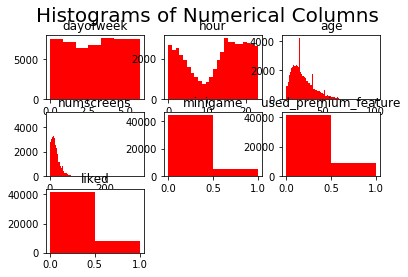

In [20]:
plt.suptitle('Histograms of Numerical Columns', fontsize=20)
for i in range(1, df_hist.shape[1]+1):
    plt.subplot(3,3,i)
    f=plt.gca()
    f.set_title(df_hist.columns.values[i-1])
    
    vals= np.size(df_hist.iloc[:, i-1].unique())
    
    plt.hist(df_hist.iloc[:, i-1], bins=vals, color='Red')

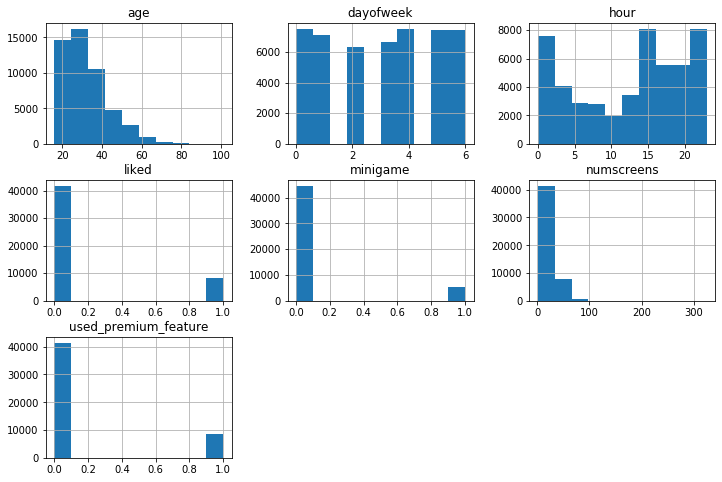

In [15]:
df_hist.hist(figsize=(12,8));

# day of week --> has an even distribution
# hour --> is UTC hour 
# age --> again is even distribution overall
# minigame --> we see most values are 0
# used_premium_feature --> we see most values are 0
# liked--> most values are 0

## Correlation Plot

We will analyse the realtion between numerical columns with the response variable.
This will give us which feature is important, how the users are interating with product


In [24]:
# Compute the correlation matrix
corr = df_hist.corrwith(df.enrolled)

In [25]:
corr

dayofweek               0.011326
hour                   -0.066694
age                    -0.131303
numscreens              0.209457
minigame                0.104979
used_premium_feature   -0.052703
liked                  -0.007022
dtype: float64

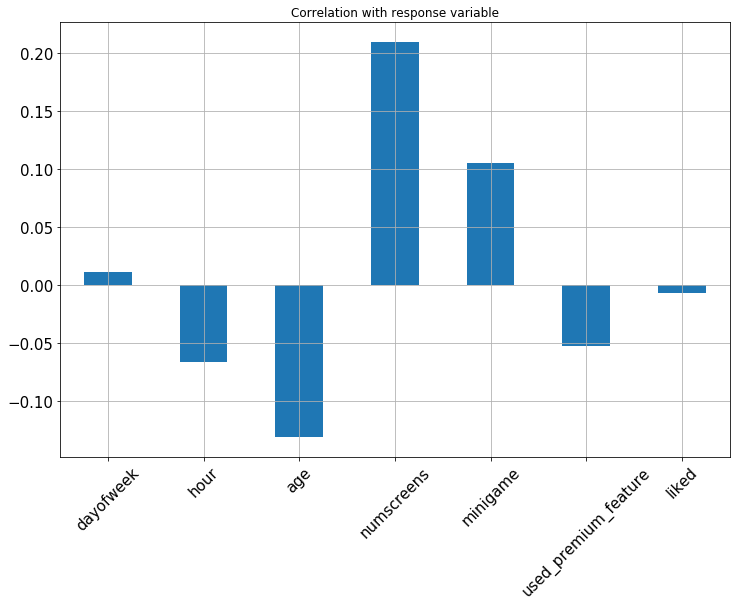

In [32]:
corr.plot.bar(figsize=(12,8),
             title='Correlation with response variable',
             fontsize=15,rot=45, grid=True)

### Heat Map Correlation

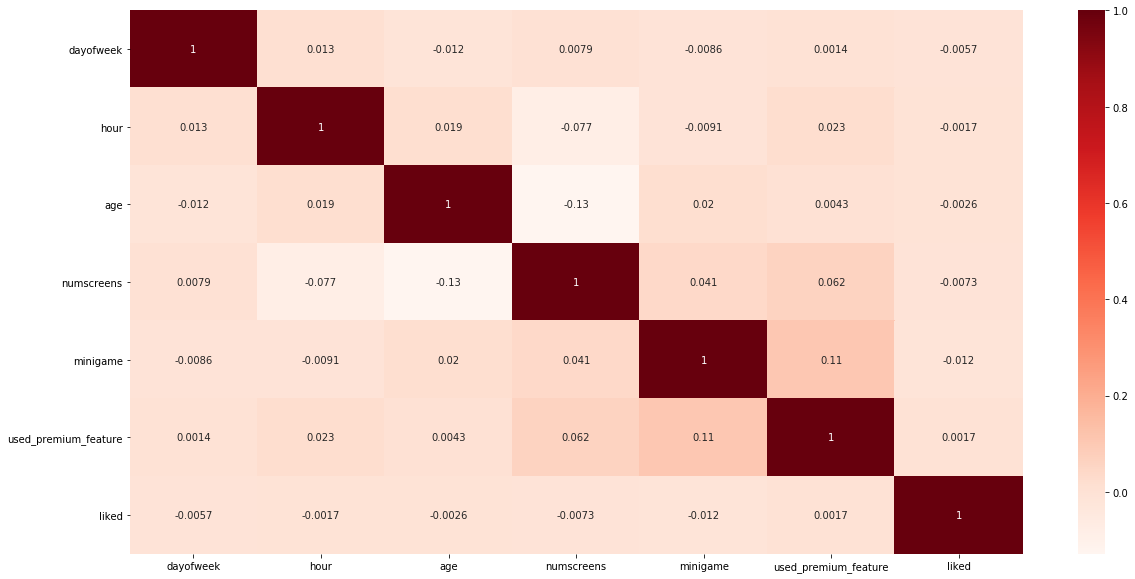

In [40]:
# Finding the relations between the variables.
plt.figure(figsize=(20,10))
c= df_hist.corr()
sns.heatmap(c,cmap='Reds',annot=True)

## CORRELATION MATRIX

Correlation between indivigual fields

MULTICOLLINEARITY

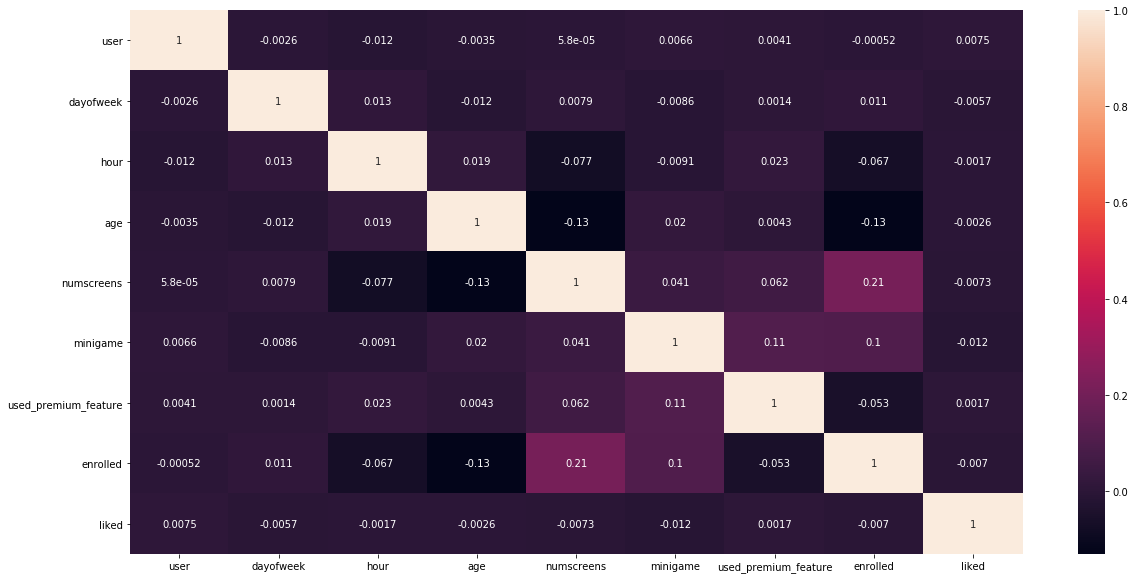

In [42]:
# Finding the relations between the variables.
plt.figure(figsize=(20,10))
c= df.corr()
sns.heatmap(c,annot=True)